In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.204131201 W= 0.4489542 b= -0.63271934
Epoch: 0100 cost= 0.189441040 W= 0.43709737 b= -0.5474219
Epoch: 0150 cost= 0.176447108 W= 0.4259455 b= -0.46719635
Epoch: 0200 cost= 0.164953947 W= 0.41545698 b= -0.39174315
Epoch: 0250 cost= 0.154788107 W= 0.40559238 b= -0.32077742
Epoch: 0300 cost= 0.145796329 W= 0.39631438 b= -0.25403252
Epoch: 0350 cost= 0.137843087 W= 0.38758814 b= -0.1912568
Epoch: 0400 cost= 0.130808458 W= 0.37938097 b= -0.13221481
Epoch: 0450 cost= 0.124586388 W= 0.37166196 b= -0.076684296
Epoch: 0500 cost= 0.119083054 W= 0.36440194 b= -0.024456408
Epoch: 0550 cost= 0.114215516 W= 0.35757372 b= 0.024665153
Epoch: 0600 cost= 0.109910302 W= 0.35115165 b= 0.07086525
Epoch: 0650 cost= 0.106102511 W= 0.3451115 b= 0.11431767
Epoch: 0700 cost= 0.102734685 W= 0.33943057 b= 0.15518565
Epoch: 0750 cost= 0.099756002 W= 0.33408755 b= 0.19362302
Epoch: 0800 cost= 0.097121581 W= 0.32906225 b= 0.2297744
Epoch: 0850 cost= 0.094791584 W= 0.32433593 b= 0.26377583
Epoch: 

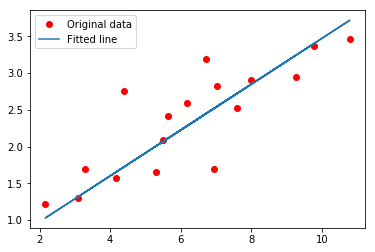

In [8]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()